In [1]:
# vectores
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# las posiciones 'y' and la carga
d = 0.5
q = 10

omega = 2 * np.pi / 10
c = 1




# plotting de color
N = 50
limits = 10
x = np.linspace(-limits, limits, N)
z = np.linspace(-limits, limits, N)
# full coordinate arrays
xx, zz = np.meshgrid(x, z)



#### campo electrico 2d
del Griffiths pagina 447, dipole radiation
$$
\vec E = - \nabla V - \frac{\partial \vec A}{\partial t}= - \frac{\mu_0 p_0 \omega^2}{4\pi} 
(\frac{\sin \theta}{r}) \cos[\omega(t-r/c)]  \hat \theta
$$

In [3]:
def E2dipolo(rx, rz, t, p0):
    '''
    campo para un dipolo con centro en x,y,z = (0,0,0)
    donde se utiliza phi = 0, por tanto el slice y=0

    se vuelve un plot de x,z
    '''
    R = np.array( [ rx, rz ] )
    theta = np.arctan2(rx,rz)
    
    
    E_field_mag = np.cos( omega * (t- R/c ) ) * np.sin(theta) / R
    
    # vector que apunta en la direccion
    theta_hat = np.array([ np.cos(theta)  , - np.sin(theta) ])


    return - E_field_mag * theta_hat

In [4]:
p0 = 2*q*d
t = 0

pos = d * np.cos(omega * t)
E_t = lambda x,z: E2dipolo(x, z, t, p0)



E_field = np.vectorize(E_t, signature='(),()->(n)')(xx, zz)
Ex = E_field[:,:,0] 
Ez = E_field[:,:,1] 

In [5]:
Emagnitud = np.sqrt(Ex**2 + Ez**2)

# normalizando
Ex = 2* Ex / Emagnitud
Ez = 2*Ez / Emagnitud

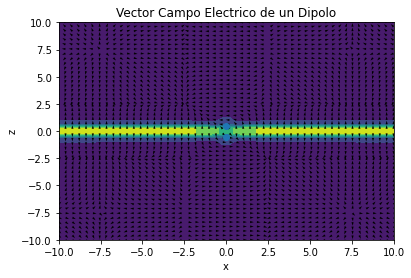

In [6]:
fig = plt.figure()
ax = fig.add_subplot()


# el campo electrico
plt.title("Vector Campo Electrico de un Dipolo")

ax.contourf(x, z, Emagnitud)
ax.quiver(xx, zz, Ex, Ez)
ax.scatter([0,0], [pos,-pos])

plt.xlabel('x')
plt.ylabel('z')
plt.show()

### Generando varias

In [7]:
# vectores
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def E2dipolo(rx, rz, t, p0):
    '''
    campo para un dipolo con centro en x,y,z = (0,0,0)
    donde se utiliza phi = 0, por tanto el slice y=0

    se vuelve un plot de x,z
    '''
    R = np.array( [ rx, rz ] )
    theta = np.arctan2(rx,rz)
    
    
    E_field_mag = np.cos( omega * (t- R/c ) ) * np.sin(theta) / R
    
    # vector que apunta en la direccion
    theta_hat = np.array([ np.cos(theta)  , - np.sin(theta) ])


    return - E_field_mag * theta_hat

In [30]:
# las posiciones 'y' and la carga
d = 0.5
q = 10

omega = 2 * np.pi / 1000
c = 1
p0 = q*d



# plotting de color
N = 50
limits = 8
x = np.linspace(-limits, limits, N)
z = np.linspace(-limits, limits, N)
# full coordinate arrays
xx, zz = np.meshgrid(x, z)


In [ ]:
%%timeit
for t in range(0, 2000):

    pos = d * np.cos(omega * t)

    E_t = lambda x,z: E2dipolo(x, z, t, p0)
    E_field = np.vectorize(E_t, signature='(),()->(n)')(xx, zz)
    Ex = E_field[:,:,0] 
    Ez = E_field[:,:,1] 

    Emagnitud = np.sqrt(Ex**2 + Ez**2)

    # normalizando
    Ex = Ex / Emagnitud
    Ez = Ez / Emagnitud

    fig = plt.figure()
    ax = fig.add_subplot()


    # el campo electrico
    plt.title("Vector Campo Electrico de un Dipolo")

    ax.contourf(x, z, Emagnitud)
    ax.quiver(xx, zz, Ex, Ez)
    ax.scatter([0,0], [pos,-pos])

    plt.xlabel('x')
    plt.ylabel('z')
    plt.savefig(f'plots2d/{str(t).zfill(4)}.png')
    plt.close()

In [20]:
# guardar en una carpeta las cosas
!zip -r '/content/plots_2d_dipole.zip' '/content/plots2d'

  adding: content/plots2d/ (stored 0%)
  adding: content/plots2d/0095.png (deflated 1%)
  adding: content/plots2d/0036.png (deflated 1%)
  adding: content/plots2d/0150.png (deflated 1%)
  adding: content/plots2d/0065.png (deflated 1%)
  adding: content/plots2d/0054.png (deflated 1%)
  adding: content/plots2d/0109.png (deflated 1%)
  adding: content/plots2d/0013.png (deflated 1%)
  adding: content/plots2d/0051.png (deflated 1%)
  adding: content/plots2d/0057.png (deflated 1%)
  adding: content/plots2d/0097.png (deflated 1%)
  adding: content/plots2d/0082.png (deflated 1%)
  adding: content/plots2d/0073.png (deflated 1%)
  adding: content/plots2d/0080.png (deflated 1%)
  adding: content/plots2d/0162.png (deflated 1%)
  adding: content/plots2d/0019.png (deflated 1%)
  adding: content/plots2d/0148.png (deflated 1%)
  adding: content/plots2d/0144.png (deflated 1%)
  adding: content/plots2d/0039.png (deflated 1%)
  adding: content/plots2d/0045.png (deflated 1%)
  adding: content/plots2d/0096

In [23]:
from google.colab import files
files.download('/content/plots_2d_dipole.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
!ffmpeg -r 30 -i 'plots2d/%04d.png' -pix_fmt yuv420p -qscale 2 dipole.mp4

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

In [28]:
files.download('/content/dipole.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>